In [2]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [44]:
%matplotlib inline

In [45]:
data = pd.read_csv('train.csv')

In [46]:
# Split data into training and testing sets
X = data.drop(['critical_temp'], axis=1)  # Input features
X = data[['number_of_elements'
,'std_atomic_mass' 
,'mean_atomic_mass' 
,'range_atomic_mass' 
,'wtd_mean_atomic_mass' 
,'wtd_gmean_atomic_mass' 
,'entropy_atomic_mass'
,'wtd_entropy_atomic_mass' 
,'wtd_range_atomic_mass' 
 ,'gmean_atomic_mass']]
X.head()

,number_of_elements,std_atomic_mass,mean_atomic_mass,range_atomic_mass,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,gmean_atomic_mass
0,4,51.968828,88.944468,122.90607,57.862692,36.116612,1.181795,1.062396,31.794921,66.361592
1,5,47.094633,92.729214,122.90607,58.518416,36.396602,1.449309,1.057755,36.161939,73.132787
2,4,51.968828,88.944468,122.90607,57.885242,36.122509,1.181795,0.975980,35.741099,66.361592
3,4,51.968828,88.944468,122.90607,57.873967,36.119560,1.181795,1.022291,33.768010,66.361592
4,4,51.968828,88.944468,122.90607,57.840143,36.110716,1.181795,1.129224,27.848743,66.361592


In [47]:
# Split data into training and testing sets
y = data['critical_temp']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [48]:
y.head()

0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64

In [49]:
X.head()

,number_of_elements,std_atomic_mass,mean_atomic_mass,range_atomic_mass,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,gmean_atomic_mass
0,4,51.968828,88.944468,122.90607,57.862692,36.116612,1.181795,1.062396,31.794921,66.361592
1,5,47.094633,92.729214,122.90607,58.518416,36.396602,1.449309,1.057755,36.161939,73.132787
2,4,51.968828,88.944468,122.90607,57.885242,36.122509,1.181795,0.975980,35.741099,66.361592
3,4,51.968828,88.944468,122.90607,57.873967,36.119560,1.181795,1.022291,33.768010,66.361592
4,4,51.968828,88.944468,122.90607,57.840143,36.110716,1.181795,1.129224,27.848743,66.361592


In [50]:
# Ridge regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [51]:
# Lasso regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Elastic-net regression
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

In [52]:
# Decision tree
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [53]:
# XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000,
                         max_depth=5, learning_rate=0.2, colsample_bytree=0.5)
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

In [54]:
#residual values
residuals_test = y_test - dtr_pred

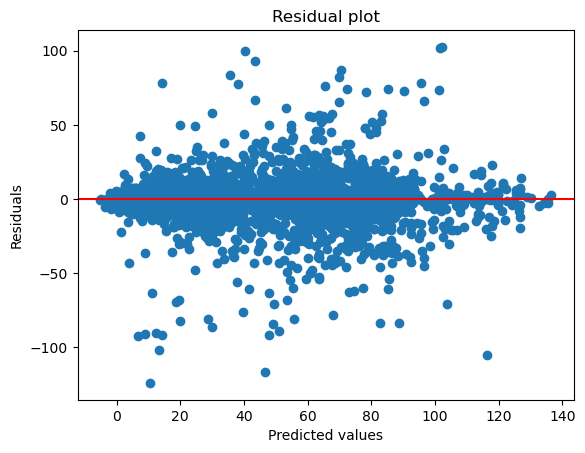

In [55]:
plt.scatter(model_pred, residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

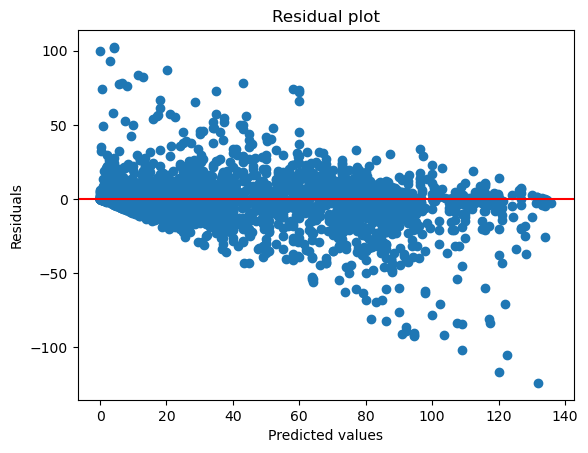

In [56]:
plt.scatter(dtr_pred, residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


In [57]:
# Cross Validation for XGBoost
scores = cross_val_score(model, X, y, cv=5)
# Print the accuracy scores for each fold
print("Accuracy scores in each fold for XGBoost model:", scores)

Accuracy scores in each fold for XGBoost model: [ 0.65396233  0.57959157  0.82101462  0.47997596 -0.00878534]


In [58]:
# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
mean_score, std_score

(0.505151827393332, 0.2800786988442737)

In [59]:
print("Mean accuracy for XGBoost model:", mean_score)
print("Standard deviation of accuracy for XGBoost model:", std_score)

Mean accuracy for XGBoost model: 0.505151827393332
Standard deviation of accuracy for XGBoost model: 0.2800786988442737


In [60]:
# Cross Validation for DT
scores1 = cross_val_score(dtr, X, y, cv=5)
# Print the accuracy scores for each fold
print("Accuracy scores in each fold for DT regresion model:", scores1)

Accuracy scores in each fold for DT regresion model: [ 0.40025367  0.33734266  0.66768523 -0.01183592 -0.46430177]


In [61]:
# Calculate the mean and standard deviation of the scores
mean_score1 = scores1.mean()
std_score1 = scores1.std()

In [62]:
print("Mean accuracy for DT model:", mean_score1)
print("Standard deviation of accuracy for DT model:", std_score1)

Mean accuracy for DT model: 0.18582877253643132
Standard deviation of accuracy for DT model: 0.3906049654210624


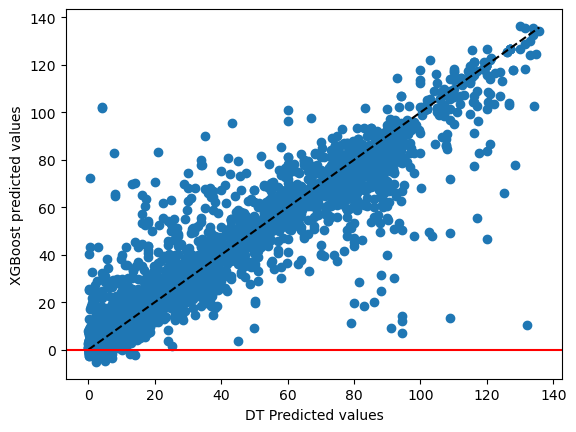

In [63]:
plt.scatter(dtr_pred, model_pred)
plt.plot([min(dtr_pred), max(dtr_pred)], [min(dtr_pred), max(dtr_pred)], 'k--')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('DT Predicted values')
plt.ylabel('XGBoost predicted values')
plt.show()

In [64]:
tolerance = 0.01  # set a tolerance level
count = 0

# loop over all points and count the ones lying on y=x line
for i in range(len(dtr_pred)):
   if abs(dtr_pred[i] - model_pred[i]) < tolerance:
        count += 1

print("Number of points lying on y=x line:", count)

Number of points lying on y=x line: 8


In [65]:
# Print the results
print('Ridge RMSE:', np.sqrt(np.mean((ridge_pred - y_test) ** 2)))
print('Lasso RMSE:', np.sqrt(np.mean((lasso_pred - y_test) ** 2)))
print('Elastic-net RMSE:', np.sqrt(np.mean((elastic_pred - y_test) ** 2)))
print('DT RMSE:', np.sqrt(mean_squared_error(y_test, dtr_pred)))
print('XGBoost RMSE:', np.sqrt(np.mean((y_test - model_pred) ** 2)))
print('Ridge R2:', r2_score(y_test, ridge_pred))
print('Lasso R2:', r2_score(y_test, lasso_pred))
print('Elastic-net R2:', r2_score(y_test, elastic_pred))
print('DT R2:', r2_score(y_test, dtr_pred))
print('XGBoost R2:', r2_score(y_test, model_pred))
print('Ridge MAE:', mean_absolute_error(y_test, ridge_pred))
print('Lasso MAE:', mean_absolute_error(y_test, lasso_pred))
print('Elastic-net MAE:', mean_absolute_error(y_test, elastic_pred))
print('DT MAE:', mean_absolute_error(y_test, dtr_pred))
print('XGBoost MAE:', mean_absolute_error(y_test, model_pred))

Ridge RMSE: 25.062726503473584
Lasso RMSE: 25.4775625730412
Elastic-net RMSE: 25.65115652266708
DT RMSE: 14.11953464279726
XGBoost RMSE: 10.767055749599251
Ridge R2: 0.45430377377708175
Lasso R2: 0.43608963869751216
Elastic-net R2: 0.4283789384968072
DT R2: 0.8268051048484912
XGBoost R2: 0.8992863712355698
Ridge MAE: 19.739924420114313
Lasso MAE: 20.273521535912305
Elastic-net MAE: 20.339888420744504
DT MAE: 6.973223753238931
XGBoost MAE: 6.558187821073794


In [66]:
rmse = np.sqrt(mean_squared_error(y_test, model_pred))
rmse

10.767055749599251

In [67]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [68]:
rf = RandomForestRegressor()
rf.fit(X_pca, y)

importances = rf.feature_importances_
feature_names = data.columns[:-1]
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

print('Top 10 Features:')
for i in range(10):
    print('%d. %s (%f)' %
          (i + 1, feature_names[indices[i]], importances[indices[i]]))

Top 10 Features:
1. number_of_elements (0.312405)
2. mean_atomic_mass (0.154861)
3. wtd_gmean_atomic_mass (0.137032)
4. wtd_entropy_atomic_mass (0.094677)
5. entropy_atomic_mass (0.080395)
6. range_atomic_mass (0.065588)
7. wtd_range_atomic_mass (0.047032)
8. gmean_atomic_mass (0.038003)
9. wtd_mean_atomic_mass (0.036977)
10. std_atomic_mass (0.033030)
